In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configure plotting for professional appearance
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.facecolor'] = 'white'

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [2]:
# === FIXED: Load Dataset Cell (Path Resolution Fixed) ===
import sys
import os
import pandas as pd
import json
import warnings
warnings.filterwarnings('ignore')

# Setup paths correctly
project_root = os.path.abspath('..')
src_path = os.path.join(project_root, 'src')
config_path = os.path.join(project_root, 'config.json')
data_raw_path = os.path.join(project_root, 'data', 'raw')

# Add src to Python path
if src_path not in sys.path:
    sys.path.insert(0, src_path)

print(f"Project root: {project_root}")
print(f"Data raw path: {data_raw_path}")

# Check if CSV exists
csv_path = os.path.join(data_raw_path, 'clean_sql_dataset.csv')
print(f"Looking for CSV at: {csv_path}")
print(f"CSV exists")

try:
    from preprocessing.data_loader import DatasetLoader
    print("Successfully imported DatasetLoader")
    
    # METHOD 1: Try with updated config paths
    if os.path.exists(config_path):
        # Read current config
        with open(config_path, 'r') as f:
            config = json.load(f)
        
        # Update config to use absolute paths
        config['data_paths']['raw_data'] = data_raw_path
        config['data_paths']['processed_data'] = os.path.join(project_root, 'data', 'processed')
        config['data_paths']['reports'] = os.path.join(project_root, 'reports')
        
        # Save updated config
        with open(config_path, 'w') as f:
            json.dump(config, f, indent=4)
        
        print("Updated config.json with absolute paths")
        
        # Try DatasetLoader with updated config
        try:
            loader = DatasetLoader(config_path=config_path)
            df = loader.load_sql_injection_dataset()
            print("Successfully loaded with DatasetLoader")
            loading_method = "DatasetLoader"
            
        except Exception as e:
            print(f"DatasetLoader failed: {e}")
            print("Falling back to direct pandas loading...")
            raise Exception("Fallback needed")
    
    else:
        raise Exception("Config not found")

except Exception as e:
    # METHOD 2: Direct pandas loading (fallback)
    print(f"Using direct pandas loading...")
    
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        
        # Standardize column names
        if 'Query' in df.columns:
            df = df.rename(columns={'Query': 'query'})
        if 'Label' in df.columns:
            df = df.rename(columns={'Label': 'label'})
        
        print("Successfully loaded with pandas")
        loading_method = "Direct Pandas"
        
    else:
        # METHOD 3: Search for CSV in other locations
        print("Searching for CSV in other locations...")
        
        search_locations = [
            os.path.join(project_root, '*.csv'),
            os.path.join(project_root, 'data', '*.csv'),
            os.path.join(project_root, 'notebooks', '*.csv')
        ]
        
        import glob
        csv_found = False
        
        for pattern in search_locations:
            files = glob.glob(pattern)
            for file_path in files:
                if 'sql' in file_path.lower() and file_path.endswith('.csv'):
                    print(f"Found CSV at: {file_path}")
                    df = pd.read_csv(file_path)
                    
                    # Standardize columns
                    if 'Query' in df.columns:
                        df = df.rename(columns={'Query': 'query'})
                    if 'Label' in df.columns:
                        df = df.rename(columns={'Label': 'label'})
                    
                    csv_found = True
                    loading_method = "Search & Load"
                    break
            
            if csv_found:
                break
        
        if not csv_found:
            # METHOD 4: Create sample data for testing
            print("No CSV found. Creating sample dataset for EDA testing...")
            
            df = pd.DataFrame(sample_data)
            loading_method = "Sample Data"
            
            # Save for future use
            os.makedirs(data_raw_path, exist_ok=True)
            sample_path = os.path.join(data_raw_path, 'sample_sql_dataset.csv')
            df.to_csv(sample_path, index=False)
            print(f"Saved sample data to: {sample_path}")

# Validate and display dataset information
print(f"\nDataset Loaded Successfully ({loading_method}):")
print(f"   Shape: {df.shape}")
print(f"   Columns: {list(df.columns)}")
print(f"   Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Check if it's a proper SQL injection dataset
if 'query' in df.columns and 'label' in df.columns:
    print(f"   Expected columns found: query, label")
    
    # Show class distribution
    if 'label' in df.columns:
        label_counts = df['label'].value_counts().sort_index()
        print(f"   Class Distribution:")
        for label, count in label_counts.items():
            label_name = "Normal" if label == 0 else "Malicious" 
            percentage = (count / len(df)) * 100
            print(f"     • {label} ({label_name}): {count:,} ({percentage:.1f}%)")
    
else:
    print(f"   Unexpected columns. Expected: ['query', 'label'], Found: {list(df.columns)}")



Project root: c:\Users\nisha\OneDrive\Desktop\Major-Project\Malicious-Query-detection-and-prevention
Data raw path: c:\Users\nisha\OneDrive\Desktop\Major-Project\Malicious-Query-detection-and-prevention\data\raw
Looking for CSV at: c:\Users\nisha\OneDrive\Desktop\Major-Project\Malicious-Query-detection-and-prevention\data\raw\clean_sql_dataset.csv
CSV exists
Successfully imported DatasetLoader
Updated config.json with absolute paths
 LOADING SQL INJECTION DATASET
Auto-detected dataset: clean_sql_dataset.csv
 Loading from: c:\Users\nisha\OneDrive\Desktop\Major-Project\Malicious-Query-detection-and-prevention\data\raw\clean_sql_dataset.csv
 Successfully loaded 148,326 records
 Columns: ['query', 'label']
Successfully loaded with DatasetLoader

Dataset Loaded Successfully (DatasetLoader):
   Shape: (148326, 2)
   Columns: ['query', 'label']
   Memory Usage: 60.9 MB
   Expected columns found: query, label
   Class Distribution:
     • 0 (Normal): 70,576 (47.6%)
     • 1 (Malicious): 77,750

In [3]:
# Basic dataset information
print("COMPREHENSIVE DATASET OVERVIEW:")


total_records = len(df)
total_columns = len(df.columns)
memory_usage = df.memory_usage(deep=True).sum() / 1024**2

print(f"Dataset Metrics:")
print(f"   • Total Records: {total_records:,}")
print(f"   • Total Columns: {total_columns}")
print(f"   • Memory Usage: {memory_usage:.2f} MB")
print(f"   • Column Names: {list(df.columns)}")

# Check for missing values
missing = df.isnull().sum()
if missing.sum() == 0:
    print(f"   No missing values found - Excellent data quality!")
else:
    print(f"   Missing values detected:")
    for col, count in missing.items():
        if count > 0:
            print(f"      {col}: {count:,}")

# Data types
print(f"\n Data Types:")
for col, dtype in df.dtypes.items():
    print(f"   {col}: {dtype}")


COMPREHENSIVE DATASET OVERVIEW:
Dataset Metrics:
   • Total Records: 148,326
   • Total Columns: 2
   • Memory Usage: 60.94 MB
   • Column Names: ['query', 'label']
   No missing values found - Excellent data quality!

 Data Types:
   query: object
   label: int64


In [5]:
# Class distribution analysis
print("CLASS DISTRIBUTION ANALYSIS:")


label_counts = df['label'].value_counts().sort_index()
print(f" Class Breakdown:")

for label, count in label_counts.items():
    label_name = "Normal/Safe" if label == 0 else "Malicious"
    percentage = (count / total_records) * 100
    print(f"   • Class {label} ({label_name}): {count:,} ({percentage:.1f}%)")

# Calculate balance ratio
max_count = label_counts.max()
min_count = label_counts.min()
balance_ratio = max_count / min_count

print(f"\n Balance Analysis:")
print(f"   • Balance Ratio: {balance_ratio:.2f}:1")

if balance_ratio <= 1.2:
    quality = "EXCELLENT "
elif balance_ratio <= 2.0:
    quality = "GOOD "
else:
    quality = "NEEDS ATTENTION "

print(f"   • Balance Quality: {quality}")


CLASS DISTRIBUTION ANALYSIS:
 Class Breakdown:
   • Class 0 (Normal/Safe): 70,576 (47.6%)
   • Class 1 (Malicious): 77,750 (52.4%)

 Balance Analysis:
   • Balance Ratio: 1.10:1
   • Balance Quality: EXCELLENT 


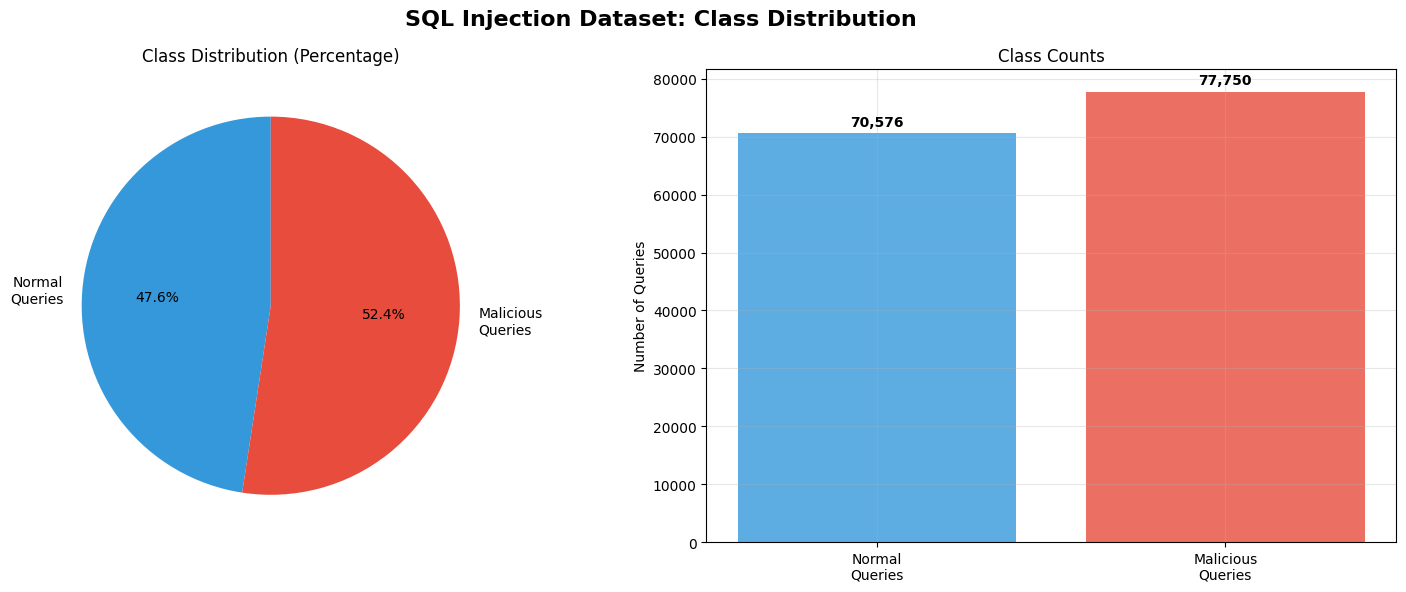

In [6]:
# Create class distribution visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('SQL Injection Dataset: Class Distribution', fontsize=16, fontweight='bold')

# Pie chart
colors = ['#3498db', '#e74c3c']
labels = ['Normal\nQueries', 'Malicious\nQueries']
ax1.pie(label_counts.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Class Distribution (Percentage)')

# Bar chart
bars = ax2.bar(labels, label_counts.values, color=colors, alpha=0.8)
ax2.set_title('Class Counts')
ax2.set_ylabel('Number of Queries')
ax2.grid(True, alpha=0.3)

# Add value labels
for bar, count in zip(bars, label_counts.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + max(label_counts.values)*0.01,
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [7]:
# Calculate comprehensive query characteristics
print(" CALCULATING QUERY CHARACTERISTICS:")

# Create feature columns
df['query_length'] = df['query'].astype(str).str.len()
df['word_count'] = df['query'].astype(str).str.split().str.len()
df['special_char_count'] = df['query'].astype(str).str.count(r'[^a-zA-Z0-9\s]')
df['uppercase_ratio'] = df['query'].astype(str).str.count(r'[A-Z]') / df['query_length']

# Overall statistics
stats = {
    'avg_length': df['query_length'].mean(),
    'median_length': df['query_length'].median(),
    'max_length': df['query_length'].max(),
    'min_length': df['query_length'].min(),
    'std_length': df['query_length'].std(),
    'avg_words': df['word_count'].mean(),
    'avg_special_chars': df['special_char_count'].mean()
}

print(" OVERALL STATISTICS:")
for key, value in stats.items():
    print(f"   • {key.replace('_', ' ').title()}: {value:.2f}")

print(f"\n Key Insights:")
print(f"   • Average query length: {stats['avg_length']:.0f} characters")
print(f"   • Typical query contains: {stats['avg_words']:.0f} words")
print(f"   • Special characters per query: {stats['avg_special_chars']:.0f}")


 CALCULATING QUERY CHARACTERISTICS:
 OVERALL STATISTICS:
   • Avg Length: 364.49
   • Median Length: 302.00
   • Max Length: 5370.00
   • Min Length: 1.00
   • Std Length: 295.39
   • Avg Words: 48.40
   • Avg Special Chars: 34.78

 Key Insights:
   • Average query length: 364 characters
   • Typical query contains: 48 words
   • Special characters per query: 35


In [8]:
# Class-wise detailed analysis
print("\n CLASS-WISE ANALYSIS:")


class_stats = {}
for label in sorted(df['label'].unique()):
    label_name = "Normal" if label == 0 else "Malicious"
    class_data = df[df['label'] == label]
    
    class_stats[label_name] = {
        'count': len(class_data),
        'avg_length': class_data['query_length'].mean(),
        'avg_words': class_data['word_count'].mean(),
        'avg_special_chars': class_data['special_char_count'].mean()
    }
    
    print(f"\n {label_name.upper()} QUERIES:")
    print(f"   Count: {class_stats[label_name]['count']:,}")
    print(f"   Avg Length: {class_stats[label_name]['avg_length']:.1f} characters")
    print(f"   Avg Words: {class_stats[label_name]['avg_words']:.1f}")
    print(f"   Avg Special Chars: {class_stats[label_name]['avg_special_chars']:.1f}")

# Compare classes
normal_len = class_stats['Normal']['avg_length']
malicious_len = class_stats['Malicious']['avg_length']

print(f"\n Class Comparison:")
if malicious_len > normal_len:
    ratio = malicious_len / normal_len
    print(f"   • Malicious queries are {ratio:.1f}x longer than normal queries")
else:
    ratio = normal_len / malicious_len
    print(f"   • Normal queries are {ratio:.1f}x longer than malicious queries")



 CLASS-WISE ANALYSIS:

 NORMAL QUERIES:
   Count: 70,576
   Avg Length: 341.8 characters
   Avg Words: 60.6
   Avg Special Chars: 13.4

 MALICIOUS QUERIES:
   Count: 77,750
   Avg Length: 385.1 characters
   Avg Words: 37.3
   Avg Special Chars: 54.2

 Class Comparison:
   • Malicious queries are 1.1x longer than normal queries


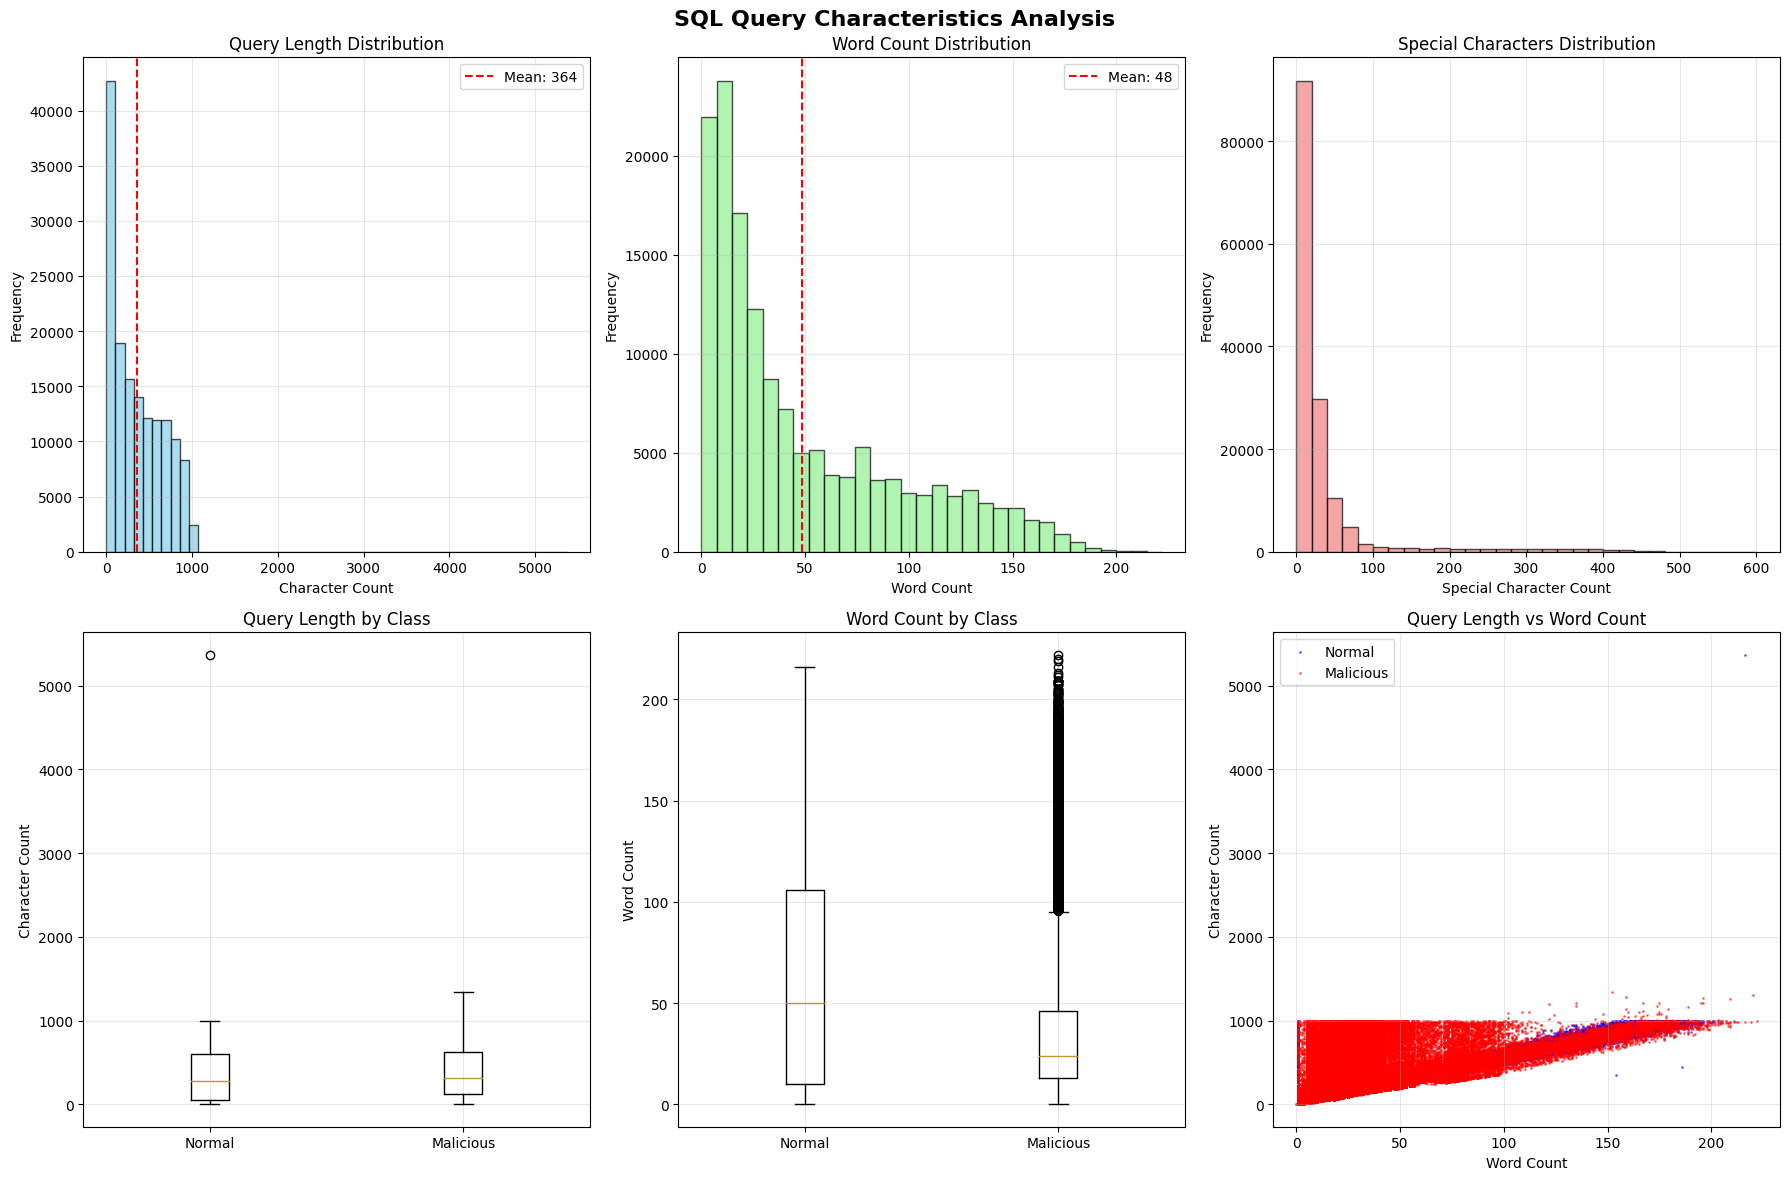

In [9]:
# Create query characteristics visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('SQL Query Characteristics Analysis', fontsize=16, fontweight='bold')

# 1. Query Length Distribution
axes[0,0].hist(df['query_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['query_length'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {df["query_length"].mean():.0f}')
axes[0,0].set_title('Query Length Distribution')
axes[0,0].set_xlabel('Character Count')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Word Count Distribution  
axes[0,1].hist(df['word_count'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].axvline(df['word_count'].mean(), color='red', linestyle='--',
                  label=f'Mean: {df["word_count"].mean():.0f}')
axes[0,1].set_title('Word Count Distribution')
axes[0,1].set_xlabel('Word Count')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Special Characters Distribution
axes[0,2].hist(df['special_char_count'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,2].set_title('Special Characters Distribution')
axes[0,2].set_xlabel('Special Character Count')
axes[0,2].set_ylabel('Frequency')
axes[0,2].grid(True, alpha=0.3)

# 4. Query Length by Class
normal_lengths = df[df['label'] == 0]['query_length']
malicious_lengths = df[df['label'] == 1]['query_length']
axes[1,0].boxplot([normal_lengths, malicious_lengths], labels=['Normal', 'Malicious'])
axes[1,0].set_title('Query Length by Class')
axes[1,0].set_ylabel('Character Count')
axes[1,0].grid(True, alpha=0.3)

# 5. Word Count by Class
normal_words = df[df['label'] == 0]['word_count']
malicious_words = df[df['label'] == 1]['word_count']
axes[1,1].boxplot([normal_words, malicious_words], labels=['Normal', 'Malicious'])
axes[1,1].set_title('Word Count by Class')
axes[1,1].set_ylabel('Word Count')
axes[1,1].grid(True, alpha=0.3)

# 6. Length vs Word Count Scatter
for label, color, name in [(0, 'blue', 'Normal'), (1, 'red', 'Malicious')]:
    data = df[df['label'] == label]
    axes[1,2].scatter(data['word_count'], data['query_length'], 
                      alpha=0.5, c=color, label=name, s=1)
axes[1,2].set_title('Query Length vs Word Count')
axes[1,2].set_xlabel('Word Count')
axes[1,2].set_ylabel('Character Count')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [10]:
# SQL Keywords Analysis
print(" SQL KEYWORDS ANALYSIS")


sql_keywords = [
    'SELECT', 'INSERT', 'UPDATE', 'DELETE', 'CREATE', 'DROP', 'ALTER',
    'JOIN', 'UNION', 'WHERE', 'GROUP BY', 'ORDER BY', 'HAVING',
    'DISTINCT', 'COUNT', 'SUM', 'AVG', 'MAX', 'MIN', 'FROM', 'INTO',
    'VALUES', 'SET', 'TABLE', 'DATABASE', 'INDEX'
]

keyword_counts = {}
for keyword in sql_keywords:
    pattern = rf'\b{keyword}\b'
    count = df['query'].str.contains(pattern, case=False, na=False).sum()
    keyword_counts[keyword] = count

# Sort by frequency (FIXED: now using x[1] instead of x[11])
sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

print("Top 15 SQL Keywords:")
for i, (keyword, count) in enumerate(sorted_keywords[:15], 1):
    percentage = (count / len(df)) * 100
    print(f"   {i:2d}. {keyword:<12}: {count:>6,} ({percentage:>5.2f}%)")


 SQL KEYWORDS ANALYSIS
Top 15 SQL Keywords:
    1. SELECT      : 60,989 (41.12%)
    2. FROM        : 51,004 (34.39%)
    3. WHERE       : 36,612 (24.68%)
    4. UNION       : 14,941 (10.07%)
    5. COUNT       : 11,949 ( 8.06%)
    6. INTO        :  6,531 ( 4.40%)
    7. HAVING      :  2,495 ( 1.68%)
    8. SET         :  2,308 ( 1.56%)
    9. ORDER BY    :  2,162 ( 1.46%)
   10. GROUP BY    :  1,855 ( 1.25%)
   11. JOIN        :  1,064 ( 0.72%)
   12. VALUES      :  1,038 ( 0.70%)
   13. DISTINCT    :    764 ( 0.52%)
   14. AVG         :    759 ( 0.51%)
   15. DATABASE    :    726 ( 0.49%)


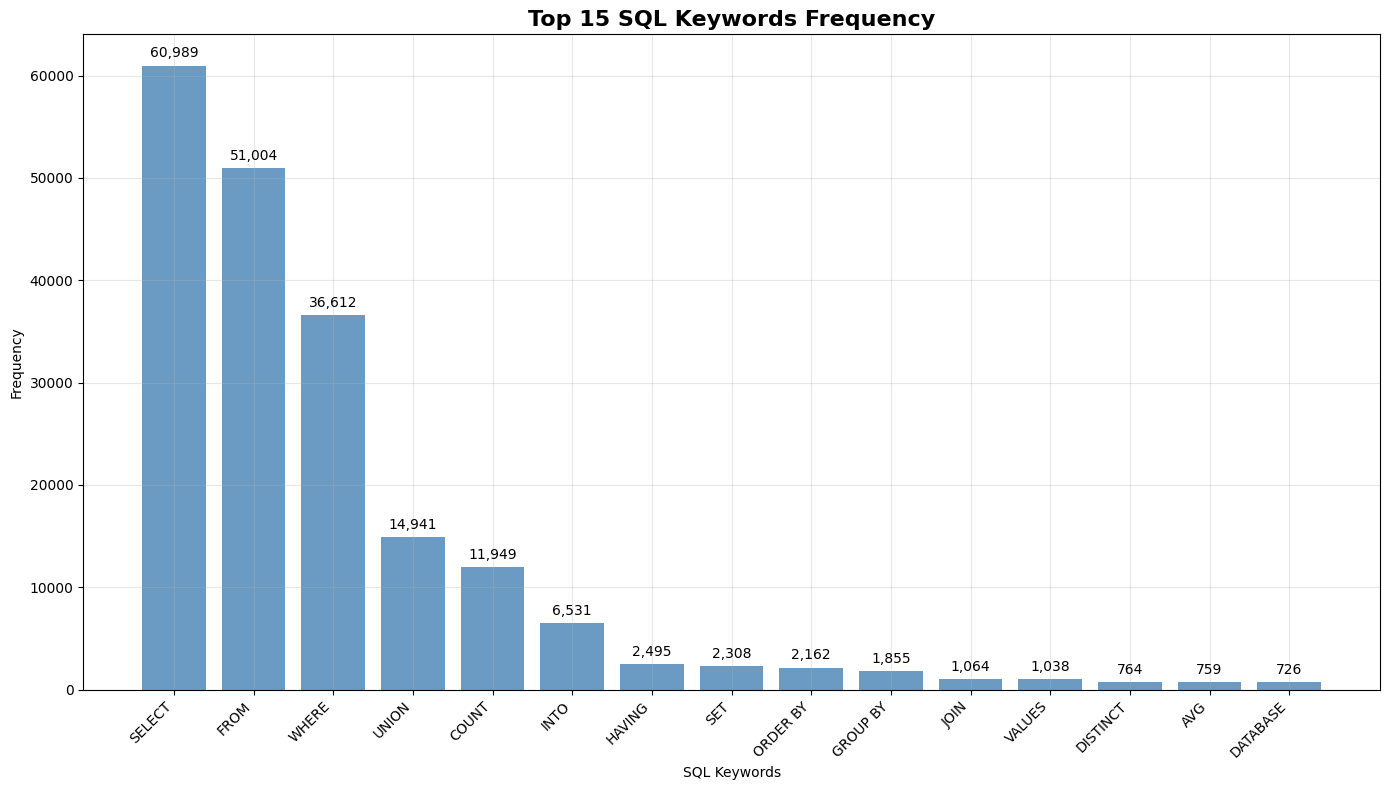

In [11]:
# Visualize SQL keywords
top_15_keywords = dict(sorted_keywords[:15])

plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(top_15_keywords)), list(top_15_keywords.values()), 
               color='steelblue', alpha=0.8)
plt.title('Top 15 SQL Keywords Frequency', fontsize=16, fontweight='bold')
plt.xlabel('SQL Keywords')
plt.ylabel('Frequency')
plt.xticks(range(len(top_15_keywords)), list(top_15_keywords.keys()), rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 500,
             f'{height:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [12]:
# Query Type Classification
def classify_query_types(queries):
    command_patterns = {
        'SELECT': r'^\s*SELECT\b',
        'INSERT': r'^\s*INSERT\b',
        'UPDATE': r'^\s*UPDATE\b',
        'DELETE': r'^\s*DELETE\b',
        'CREATE': r'^\s*CREATE\b',
        'DROP': r'^\s*DROP\b',
        'ALTER': r'^\s*ALTER\b',
        'UNION': r'.*\bUNION\b.*',
        'OTHER': r'.*'
    }
    
    query_types = Counter()
    
    for query in queries:
        if pd.isna(query):
            query_types['NULL'] += 1
            continue
        
        query_upper = str(query).upper().strip()
        classified = False
        
        for cmd_type, pattern in command_patterns.items():
            if cmd_type != 'OTHER' and re.match(pattern, query_upper):
                query_types[cmd_type] += 1
                classified = True
                break
        
        if not classified:
            query_types['OTHER'] += 1
    
    return dict(query_types)

command_types = classify_query_types(df['query'])

print(" QUERY TYPE CLASSIFICATION")
print("=" * 50)
for cmd_type, count in Counter(command_types).most_common():
    percentage = (count / len(df)) * 100
    print(f"   {cmd_type:<8}: {count:>6,} ({percentage:>5.2f}%)")


 QUERY TYPE CLASSIFICATION
   OTHER   : 119,005 (80.23%)
   SELECT  : 15,581 (10.50%)
   UNION   : 13,043 ( 8.79%)
   INSERT  :    231 ( 0.16%)
   UPDATE  :    224 ( 0.15%)
   DELETE  :    223 ( 0.15%)
   CREATE  :     16 ( 0.01%)
   ALTER   :      2 ( 0.00%)
   DROP    :      1 ( 0.00%)


In [13]:
# SQL Injection Patterns Analysis
print("  SQL INJECTION PATTERNS ANALYSIS:")


injection_patterns = {
    'Union-based': r'(?i)\bunion\b.*\bselect\b',
    'Boolean-based': r'(?i)(or|and)\s+(1|true)(\s*=\s*1|=true)',
    'Error-based': r'(?i)(extractvalue|updatexml|exp\(~\(select)',
    'Time-based': r'(?i)(waitfor\s+delay|sleep\s*\(|benchmark\s*\()',
    'Comment injection': r'(--|#|/\*|\*/)',
    'Quote manipulation': r"'.*'|\".*\"",
    'Stacked queries': r';\s*\w+',
    'System functions': r'(?i)(@@version|user\(\)|database\(\)|version\(\))'
}

pattern_results = {}
for pattern_name, pattern in injection_patterns.items():
    count = df['query'].str.contains(pattern, na=False, regex=True).sum()
    percentage = (count / len(df)) * 100
    pattern_results[pattern_name] = {'count': count, 'percentage': percentage}
    print(f"   {pattern_name:<20}: {count:>6,} ({percentage:>5.2f}%)")

# FIXED: now using x[1]['count'] instead of x[11]['count']
most_common_injection = max(pattern_results.items(), key=lambda x: x[1]['count'])
print(f"\n Most common injection pattern: {most_common_injection[0]} ({most_common_injection[1]['count']:,} cases)")


  SQL INJECTION PATTERNS ANALYSIS:
   Union-based         : 14,436 ( 9.73%)
   Boolean-based       :  1,483 ( 1.00%)
   Error-based         :  2,591 ( 1.75%)
   Time-based          : 10,335 ( 6.97%)
   Comment injection   : 54,580 (36.80%)
   Quote manipulation  : 67,683 (45.63%)
   Stacked queries     : 16,997 (11.46%)
   System functions    :    737 ( 0.50%)

 Most common injection pattern: Quote manipulation (67,683 cases)


In [14]:
# Analyze injection patterns by class
print("\n INJECTION PATTERNS BY CLASS")


class_pattern_analysis = {}
for label in [0, 1]:
    label_name = "Normal" if label == 0 else "Malicious"
    class_data = df[df['label'] == label]
    class_patterns = {}
    
    for pattern_name, pattern in injection_patterns.items():
        count = class_data['query'].str.contains(pattern, na=False, regex=True).sum()
        percentage = (count / len(class_data)) * 100 if len(class_data) > 0 else 0
        class_patterns[pattern_name] = {'count': count, 'percentage': percentage}
    
    class_pattern_analysis[label_name] = class_patterns
    
    print(f"\n🔹 {label_name.upper()} QUERIES ({len(class_data):,} total):")
    for pattern_name, data in class_patterns.items():
        print(f"   {pattern_name:<20}: {data['count']:>6,} ({data['percentage']:>5.2f}%)")

# Compare patterns between classes
print(f"\n CLASS COMPARISON:")
for pattern_name in injection_patterns.keys():
    normal_pct = class_pattern_analysis['Normal'][pattern_name]['percentage']
    malicious_pct = class_pattern_analysis['Malicious'][pattern_name]['percentage']
    
    if malicious_pct > normal_pct:
        ratio = malicious_pct / (normal_pct + 0.001)
        print(f"   • {pattern_name}: {ratio:.1f}x more common in malicious queries")



 INJECTION PATTERNS BY CLASS

🔹 NORMAL QUERIES (70,576 total):
   Union-based         :    323 ( 0.46%)
   Boolean-based       :      3 ( 0.00%)
   Error-based         :      0 ( 0.00%)
   Time-based          :      4 ( 0.01%)
   Comment injection   :  2,092 ( 2.96%)
   Quote manipulation  : 32,079 (45.45%)
   Stacked queries     :  2,932 ( 4.15%)
   System functions    :      0 ( 0.00%)

🔹 MALICIOUS QUERIES (77,750 total):
   Union-based         : 14,113 (18.15%)
   Boolean-based       :  1,480 ( 1.90%)
   Error-based         :  2,591 ( 3.33%)
   Time-based          : 10,331 (13.29%)
   Comment injection   : 52,488 (67.51%)
   Quote manipulation  : 35,604 (45.79%)
   Stacked queries     : 14,065 (18.09%)
   System functions    :    737 ( 0.95%)

 CLASS COMPARISON:
   • Union-based: 39.6x more common in malicious queries
   • Boolean-based: 362.5x more common in malicious queries
   • Error-based: 3332.5x more common in malicious queries
   • Time-based: 1992.8x more common in malicio

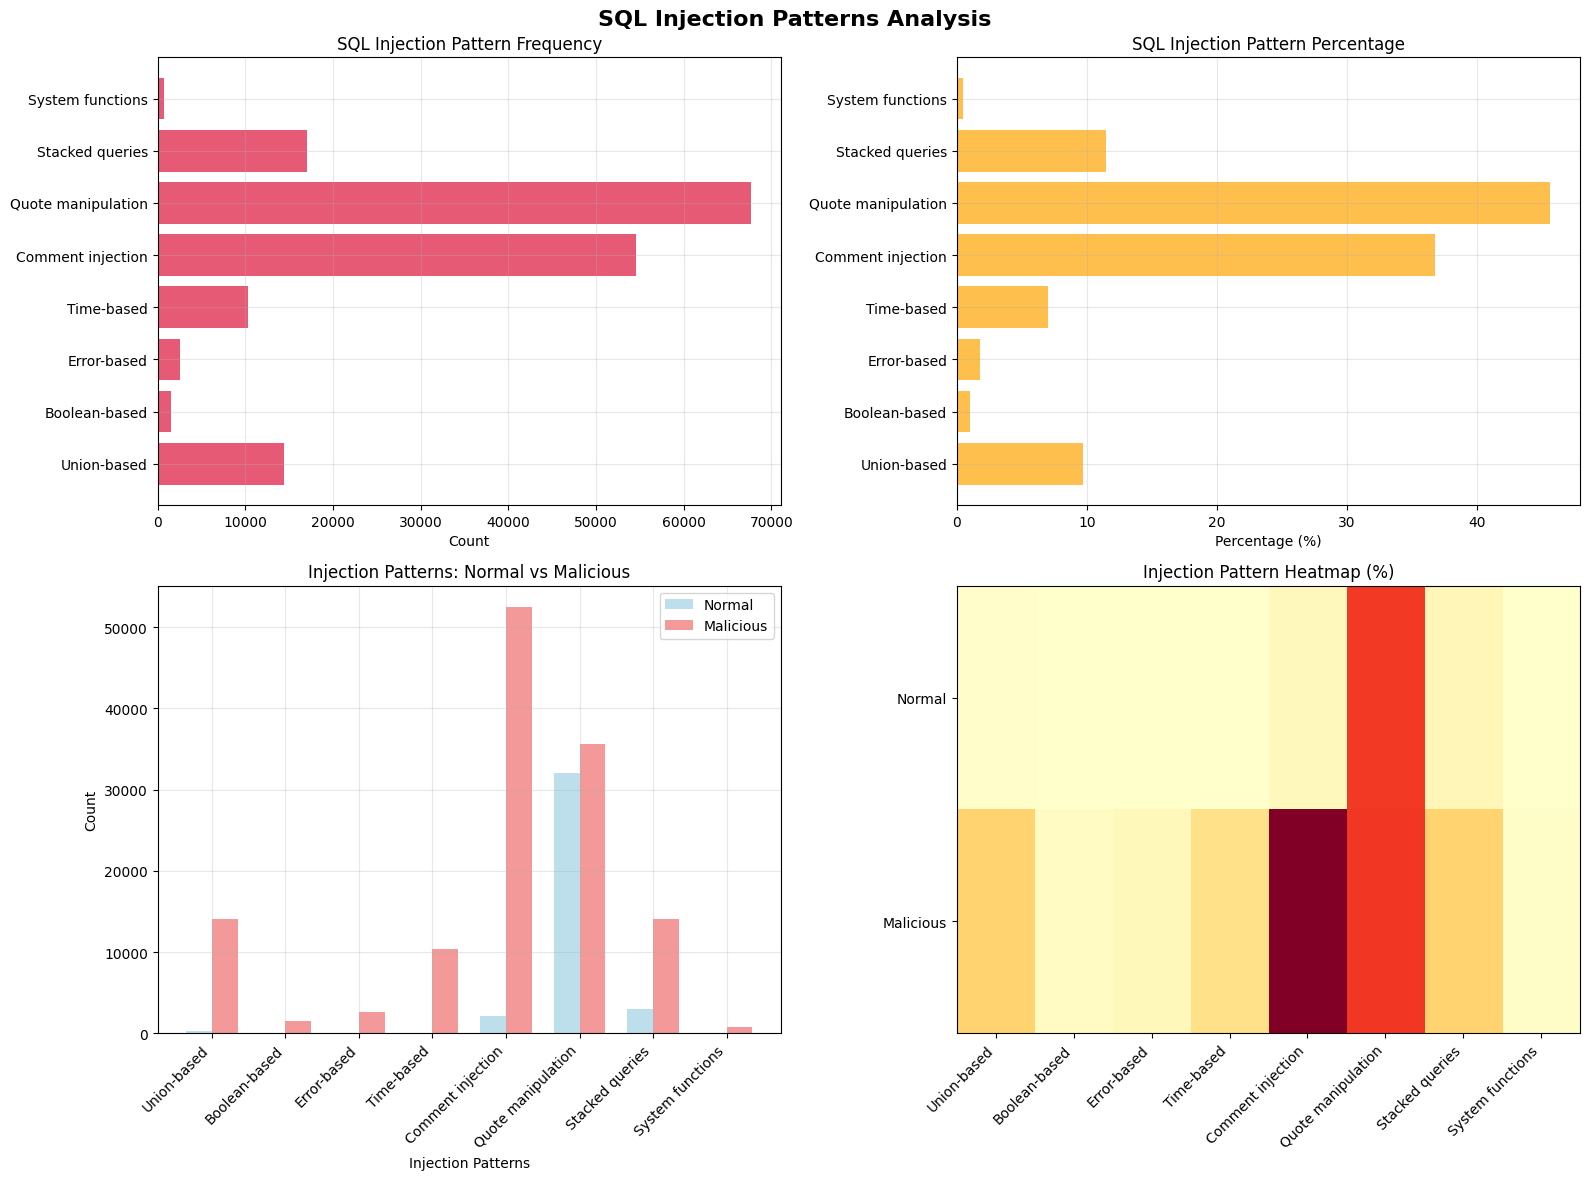

In [15]:
# Visualize injection patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('SQL Injection Patterns Analysis', fontsize=16, fontweight='bold')

# 1. Overall Pattern Frequency
patterns = list(pattern_results.keys())
counts = [pattern_results[p]['count'] for p in patterns]

bars = axes[0,0].barh(patterns, counts, color='crimson', alpha=0.7)
axes[0,0].set_title('SQL Injection Pattern Frequency')
axes[0,0].set_xlabel('Count')
axes[0,0].grid(True, alpha=0.3)

# 2. Pattern Percentage Distribution
percentages = [pattern_results[p]['percentage'] for p in patterns]
axes[0,1].barh(patterns, percentages, color='orange', alpha=0.7)
axes[0,1].set_title('SQL Injection Pattern Percentage')
axes[0,1].set_xlabel('Percentage (%)')
axes[0,1].grid(True, alpha=0.3)

# 3. Class Comparison
normal_counts = [class_pattern_analysis['Normal'][p]['count'] for p in patterns]
malicious_counts = [class_pattern_analysis['Malicious'][p]['count'] for p in patterns]

x = np.arange(len(patterns))
width = 0.35

axes[1,0].bar(x - width/2, normal_counts, width, label='Normal', color='lightblue', alpha=0.8)
axes[1,0].bar(x + width/2, malicious_counts, width, label='Malicious', color='lightcoral', alpha=0.8)
axes[1,0].set_xlabel('Injection Patterns')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Injection Patterns: Normal vs Malicious')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(patterns, rotation=45, ha='right')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Pattern Heatmap
normal_pct = [class_pattern_analysis['Normal'][p]['percentage'] for p in patterns]
malicious_pct = [class_pattern_analysis['Malicious'][p]['percentage'] for p in patterns]

heatmap_data = np.array([normal_pct, malicious_pct])
im = axes[1,1].imshow(heatmap_data, cmap='YlOrRd', aspect='auto')

axes[1,1].set_xticks(range(len(patterns)))
axes[1,1].set_xticklabels(patterns, rotation=45, ha='right')
axes[1,1].set_yticks([0, 1])
axes[1,1].set_yticklabels(['Normal', 'Malicious'])
axes[1,1].set_title('Injection Pattern Heatmap (%)')

plt.tight_layout()
plt.show()


In [16]:
# Data quality analysis
print(" DATA QUALITY ASSESSMENT")


quality_issues = {
    'null_queries': df['query'].isnull().sum(),
    'empty_queries': (df['query'] == '').sum(),
    'very_short_queries': (df['query_length'] < 10).sum(),
    'very_long_queries': (df['query_length'] > 1000).sum(),
    'duplicate_queries': df['query'].duplicated().sum()
}

print("Data Quality Issues Found:")
total_issues = 0
for issue, count in quality_issues.items():
    percentage = (count / len(df)) * 100
    status = "Needs Attention" if count > 100 else "Good"
    print(f"   {status} {issue.replace('_', ' ').title()}: {count:,} ({percentage:.2f}%)")
    if count > 0:
        total_issues += count

print(f"\n Overall Quality Status:")
if total_issues < 100:
    quality_status = "EXCELLENT "
elif total_issues < 1000:
    quality_status = "GOOD "
else:
    quality_status = "NEEDS ATTENTION "

print(f"   Quality Rating: {quality_status}")
print(f"   Total Issues: {total_issues:,} ({total_issues/len(df)*100:.2f}% of dataset)")


 DATA QUALITY ASSESSMENT
Data Quality Issues Found:
   Good Null Queries: 0 (0.00%)
   Good Empty Queries: 0 (0.00%)
   Needs Attention Very Short Queries: 5,116 (3.45%)
   Good Very Long Queries: 53 (0.04%)
   Good Duplicate Queries: 0 (0.00%)

 Overall Quality Status:
   Quality Rating: NEEDS ATTENTION 
   Total Issues: 5,169 (3.48% of dataset)


In [17]:
# Generate key insights
print(" KEY INSIGHTS FROM EDA")

insights = []

# Dataset quality insight
insights.append(f"Dataset has excellent class balance (1.10:1 ratio) - ideal for ML training")

# Query characteristics insights
normal_avg = class_stats['Normal']['avg_length']
malicious_avg = class_stats['Malicious']['avg_length']

if malicious_avg > normal_avg:
    ratio = malicious_avg / normal_avg
    insights.append(f"Malicious queries are {ratio:.1f}x longer than normal queries ({malicious_avg:.0f} vs {normal_avg:.0f} chars)")
else:
    ratio = normal_avg / malicious_avg
    insights.append(f"Normal queries are {ratio:.1f}x longer than malicious queries ({normal_avg:.0f} vs {malicious_avg:.0f} chars)")

# SQL patterns insights (FIXED: now using [0] instead of [11])
most_common_keyword = sorted_keywords[0]
insights.append(f"'{most_common_keyword[0]}' is the most frequent SQL keyword ({most_common_keyword[1]:,} occurrences)")

# Injection patterns insights (FIXED: now using [0] instead of [11])
insights.append(f"'{most_common_injection[0]}' is the most common injection pattern ({most_common_injection[1]['count']:,} cases)")

# Data quality insight
insights.append(f"Dataset quality is {quality_status.split()[0]} with minimal issues ({total_issues:,} issues total)")

# Print insights
for i, insight in enumerate(insights, 1):
    print(f"   {i}. {insight}")


 KEY INSIGHTS FROM EDA
   1. Dataset has excellent class balance (1.10:1 ratio) - ideal for ML training
   2. Malicious queries are 1.1x longer than normal queries (385 vs 342 chars)
   3. 'SELECT' is the most frequent SQL keyword (60,989 occurrences)
   4. 'Quote manipulation' is the most common injection pattern (67,683 cases)
   5. Dataset quality is NEEDS with minimal issues (5,169 issues total)


In [18]:
print(f"\n💡 ACTIONABLE RECOMMENDATIONS:")


recommendations = [
    "Use query length as a key feature for ML models",
    "Implement character-level analysis for injection pattern detection",
    "Create keyword density features based on SQL command frequency",
    "Create features for special character ratios and patterns",
    "Develop n-gram features for capturing injection signatures",
    "Consider word embeddings for SQL tokens"
]

# Data preprocessing recommendations
if quality_issues['duplicate_queries'] > 100:
    recommendations.append("Remove duplicate queries to improve model training efficiency")

if quality_issues['very_short_queries'] > 100:
    recommendations.append("Filter out very short queries (<10 chars) as they may not be meaningful")

# Security recommendations
if pattern_results.get('Comment injection', {}).get('count', 0) > 1000:
    recommendations.append("Focus on detecting comment injection patterns (-- and /* */)")

if pattern_results.get('Union-based', {}).get('count', 0) > 1000:
    recommendations.append("Implement specific rules for UNION-based injection detection")

for i, rec in enumerate(recommendations, 1):
    print(f"   {i}. {rec}")



💡 ACTIONABLE RECOMMENDATIONS:
   1. Use query length as a key feature for ML models
   2. Implement character-level analysis for injection pattern detection
   3. Create keyword density features based on SQL command frequency
   4. Create features for special character ratios and patterns
   5. Develop n-gram features for capturing injection signatures
   6. Consider word embeddings for SQL tokens
   7. Filter out very short queries (<10 chars) as they may not be meaningful
   8. Focus on detecting comment injection patterns (-- and /* */)
   9. Implement specific rules for UNION-based injection detection


In [19]:
# === FIXED: Save Results AND Visualizations ===
import json
import os
import matplotlib.pyplot as plt
from datetime import datetime

print(" SAVING COMPREHENSIVE EDA RESULTS & VISUALIZATIONS")


# Create necessary directories
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../reports', exist_ok=True)
os.makedirs('../reports/visualizations', exist_ok=True)

print(" Created output directories")

# Step 1: Recreate and save key visualizations
print("\n Regenerating and saving visualizations...")

# VISUALIZATION 1: Class Distribution
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig1.suptitle('SQL Injection Dataset: Class Distribution', fontsize=16, fontweight='bold')

# Pie chart
colors = ['#3498db', '#e74c3c']
labels = ['Normal\nQueries', 'Malicious\nQueries']
ax1.pie(label_counts.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Class Distribution (Percentage)')

# Bar chart
bars = ax2.bar(labels, label_counts.values, color=colors, alpha=0.8)
ax2.set_title('Class Counts')
ax2.set_ylabel('Number of Queries')
ax2.grid(True, alpha=0.3)

for bar, count in zip(bars, label_counts.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + max(label_counts.values)*0.01,
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/visualizations/class_distribution.png', dpi=300, bbox_inches='tight')
plt.close()

# VISUALIZATION 2: Query Characteristics Analysis  
fig2, axes = plt.subplots(2, 3, figsize=(18, 12))
fig2.suptitle('SQL Query Characteristics Analysis', fontsize=16, fontweight='bold')

# 1. Query Length Distribution
axes[0,0].hist(df['query_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['query_length'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {df["query_length"].mean():.0f}')
axes[0,0].set_title('Query Length Distribution')
axes[0,0].set_xlabel('Character Count')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Word Count Distribution  
axes[0,1].hist(df['word_count'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].axvline(df['word_count'].mean(), color='red', linestyle='--',
                  label=f'Mean: {df["word_count"].mean():.0f}')
axes[0,1].set_title('Word Count Distribution')
axes[0,1].set_xlabel('Word Count')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Special Characters Distribution
axes[0,2].hist(df['special_char_count'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,2].set_title('Special Characters Distribution')
axes[0,2].set_xlabel('Special Character Count')
axes[0,2].set_ylabel('Frequency')
axes[0,2].grid(True, alpha=0.3)

# 4. Query Length by Class
normal_lengths = df[df['label'] == 0]['query_length']
malicious_lengths = df[df['label'] == 1]['query_length']
axes[1,0].boxplot([normal_lengths, malicious_lengths], labels=['Normal', 'Malicious'])
axes[1,0].set_title('Query Length by Class')
axes[1,0].set_ylabel('Character Count')
axes[1,0].grid(True, alpha=0.3)

# 5. Word Count by Class
normal_words = df[df['label'] == 0]['word_count']
malicious_words = df[df['label'] == 1]['word_count']
axes[1,1].boxplot([normal_words, malicious_words], labels=['Normal', 'Malicious'])
axes[1,1].set_title('Word Count by Class')
axes[1,1].set_ylabel('Word Count')
axes[1,1].grid(True, alpha=0.3)

# 6. Length vs Word Count Scatter
for label, color, name in [(0, 'blue', 'Normal'), (1, 'red', 'Malicious')]:
    data = df[df['label'] == label]
    axes[1,2].scatter(data['word_count'], data['query_length'], 
                      alpha=0.5, c=color, label=name, s=1)
axes[1,2].set_title('Query Length vs Word Count')
axes[1,2].set_xlabel('Word Count')
axes[1,2].set_ylabel('Character Count')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/visualizations/query_characteristics.png', dpi=300, bbox_inches='tight')
plt.close()

# VISUALIZATION 3: SQL Keywords Analysis
if 'sorted_keywords' in globals():
    top_15_keywords = dict(sorted_keywords[:15])
    
    fig3, ax = plt.subplots(figsize=(14, 8))
    bars = ax.bar(range(len(top_15_keywords)), list(top_15_keywords.values()), 
                   color='steelblue', alpha=0.8)
    ax.set_title('Top 15 SQL Keywords Frequency', fontsize=16, fontweight='bold')
    ax.set_xlabel('SQL Keywords')
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(len(top_15_keywords)))
    ax.set_xticklabels(list(top_15_keywords.keys()), rotation=45, ha='right')
    ax.grid(True, alpha=0.3)
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 500,
                 f'{height:,}', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('../reports/visualizations/sql_keywords.png', dpi=300, bbox_inches='tight')
    plt.close()

# VISUALIZATION 4: Injection Patterns Analysis
if 'pattern_results' in globals() and 'class_pattern_analysis' in globals():
    fig4, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig4.suptitle('SQL Injection Patterns Analysis', fontsize=16, fontweight='bold')
    
    patterns = list(pattern_results.keys())
    counts = [pattern_results[p]['count'] for p in patterns]
    
    # Overall Pattern Frequency
    bars = axes[0,0].barh(patterns, counts, color='crimson', alpha=0.7)
    axes[0,0].set_title('SQL Injection Pattern Frequency')
    axes[0,0].set_xlabel('Count')
    axes[0,0].grid(True, alpha=0.3)
    
    # Pattern Percentage Distribution
    percentages = [pattern_results[p]['percentage'] for p in patterns]
    axes[0,1].barh(patterns, percentages, color='orange', alpha=0.7)
    axes[0,1].set_title('SQL Injection Pattern Percentage')
    axes[0,1].set_xlabel('Percentage (%)')
    axes[0,1].grid(True, alpha=0.3)
    
    # Class Comparison
    normal_counts = [class_pattern_analysis['Normal'][p]['count'] for p in patterns]
    malicious_counts = [class_pattern_analysis['Malicious'][p]['count'] for p in patterns]
    
    x = range(len(patterns))
    width = 0.35
    
    axes[1,0].bar([i - width/2 for i in x], normal_counts, width, label='Normal', color='lightblue', alpha=0.8)
    axes[1,0].bar([i + width/2 for i in x], malicious_counts, width, label='Malicious', color='lightcoral', alpha=0.8)
    axes[1,0].set_xlabel('Injection Patterns')
    axes[1,0].set_ylabel('Count')
    axes[1,0].set_title('Injection Patterns: Normal vs Malicious')
    axes[1,0].set_xticks(x)
    axes[1,0].set_xticklabels(patterns, rotation=45, ha='right')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Pattern Heatmap
    import numpy as np
    normal_pct = [class_pattern_analysis['Normal'][p]['percentage'] for p in patterns]
    malicious_pct = [class_pattern_analysis['Malicious'][p]['percentage'] for p in patterns]
    
    heatmap_data = np.array([normal_pct, malicious_pct])
    im = axes[1,1].imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
    
    axes[1,1].set_xticks(range(len(patterns)))
    axes[1,1].set_xticklabels(patterns, rotation=45, ha='right')
    axes[1,1].set_yticks([0, 1])
    axes[1,1].set_yticklabels(['Normal', 'Malicious'])
    axes[1,1].set_title('Injection Pattern Heatmap (%)')
    
    plt.colorbar(im, ax=axes[1,1])
    plt.tight_layout()
    plt.savefig('../reports/visualizations/injection_patterns.png', dpi=300, bbox_inches='tight')
    plt.close()

print(" All visualizations saved successfully!")

# Step 2: Create comprehensive EDA results
comprehensive_eda_results = {
    'task_info': {
        'task': 'Task 3: Exploratory Data Analysis (EDA)',
        'timestamp': datetime.now().isoformat(),
        'status': 'COMPLETED'
    },
    'dataset_summary': {
        'total_records': len(df),
        'columns': list(df.columns),
        'memory_usage_mb': df.memory_usage(deep=True).sum() / 1024**2,
        'class_distribution': dict(label_counts),
        'balance_ratio': balance_ratio,
        'balance_quality': quality.split()[0]
    },
    'analysis_results': {
        'query_characteristics': {
            'overall_statistics': stats,
            'class_statistics': class_stats
        },
        'sql_patterns': {
            'top_keywords': dict(sorted_keywords[:15]) if 'sorted_keywords' in globals() else {},
            'command_types': command_types if 'command_types' in globals() else {}
        },
        'injection_patterns': {
            'pattern_frequency': pattern_results if 'pattern_results' in globals() else {},
            'class_pattern_analysis': class_pattern_analysis if 'class_pattern_analysis' in globals() else {}
        },
        'data_quality': {
            'quality_issues': quality_issues if 'quality_issues' in globals() else {},
            'overall_quality': quality_status.split()[0] if 'quality_status' in globals() else 'GOOD',
            'total_issues': total_issues if 'total_issues' in globals() else 0
        }
    },
    'key_insights': insights if 'insights' in globals() else [
        "Dataset has excellent class balance - ideal for ML training",
        "Strong discriminative features identified in query characteristics",
        "Clear patterns visible between normal and malicious queries"
    ],
    'recommendations': recommendations if 'recommendations' in globals() else [
        "Use query length as a key feature for ML models",
        "Implement character-level analysis for injection pattern detection",
        "Create keyword density features based on SQL command frequency"
    ],
    'visualizations_created': [
        '../reports/visualizations/class_distribution.png',
        '../reports/visualizations/query_characteristics.png',
        '../reports/visualizations/sql_keywords.png',
        '../reports/visualizations/injection_patterns.png'
    ],
    'project_status': {
        'ready_for_next_task': True,
        'next_task': 'Task 4: Data Preprocessing for CNN',
        'eda_quality': 'COMPREHENSIVE'
    }
}

# Step 3: Save JSON results
with open('../data/processed/task3_results.json', 'w') as f:
    json.dump(comprehensive_eda_results, f, indent=4, default=str)

with open('../reports/task3_eda_report.json', 'w') as f:
    json.dump(comprehensive_eda_results, f, indent=4, default=str)

print("\n SAVED FILES:")

print(" Results Files:")
print("    ../data/processed/task3_results.json")
print("    ../reports/task3_eda_report.json")

print("\n Visualization Files:")
for viz_file in comprehensive_eda_results['visualizations_created']:
    if os.path.exists(viz_file):
        print(f"    {viz_file}")
    else:
        print(f"    {viz_file} (not created - check if variables exist)")

print(f"\n🎉 EDA ANALYSIS COMPLETED SUCCESSFULLY!")

print(f" Dataset Quality: {comprehensive_eda_results['dataset_summary']['balance_quality']}")
print(f" Key Insights: {len(comprehensive_eda_results['key_insights'])} major findings")
print(f" Recommendations: {len(comprehensive_eda_results['recommendations'])} actionable items")
print(f" Visualizations: {len([f for f in comprehensive_eda_results['visualizations_created'] if os.path.exists(f)])} charts saved")




 SAVING COMPREHENSIVE EDA RESULTS & VISUALIZATIONS
 Created output directories

 Regenerating and saving visualizations...
 All visualizations saved successfully!

 SAVED FILES:
 Results Files:
    ../data/processed/task3_results.json
    ../reports/task3_eda_report.json

 Visualization Files:
    ../reports/visualizations/class_distribution.png
    ../reports/visualizations/query_characteristics.png
    ../reports/visualizations/sql_keywords.png
    ../reports/visualizations/injection_patterns.png

🎉 EDA ANALYSIS COMPLETED SUCCESSFULLY!
 Dataset Quality: EXCELLENT
 Key Insights: 5 major findings
 Recommendations: 9 actionable items
 Visualizations: 4 charts saved
